<a href="https://colab.research.google.com/github/swiftfox2263/sensor-data/blob/main/Major_Project_Corizo_Group_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DOMAIN SEMI-CONDUCTOR MANUFACTURER

**Project Introduction**:
A complex modern semiconductor manufacturing process is normally
under constant surveillance via the monitoring of signals variables collected from
sensors and or process measurement points. However, not all of these signals are
equally valuable in a specific monitoring system. The measured signals contain a
combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are required. If we consider each
type of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an
increase in process throughput, decreased time to learning and reduce the per unit
production costs. These signals can be used as features to predict the yield type. And by
analysing and trying out different combinations of features, essential signals that are
impacting the yield type can be identified.

**Project Description:**The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each
example represents a single production entity with associated measured features and
the labels represent a simple pass/fail yield for in house line testing. Target column “ –1”
corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that
specific test point.

**Project Objective**: We will build a classifier to predict the Pass/Fail yield of a
particular process entity and analyse whether all the features are required to build the
model or not.

#1)Importing the Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
# Load the dataset with proper delimiter handling
# Replace 'error_bad_lines' with 'on_bad_lines' and set it to 'skip' to ignore bad lines
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sensor-data.csv', delim_whitespace=True, on_bad_lines='skip', header=None)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get an overview of the data structure
print("Data structure overview:")
print(data.info())

# Get summary statistics of the dataset
print("Summary statistics of the dataset:")
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

<ipython-input-75-2fe445610900>:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sensor-data.csv', delim_whitespace=True, on_bad_lines='skip', header=None)


First few rows of the dataset:
       0        1          2          3       4      5         6       7    \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

      8       9    ...     580       581     582     583     584      585  \
0  1.5005  0.0162  ...     NaN       NaN  0.5005  0.0118  0.0035   2.3630   
1  1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2  1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
3  1.4882 -0.0124  ...  0.0044   73.8432  0.4990  0.0103  0.0025   2.0544   
4  1.5031 -0.0031  ...     NaN       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  

#2)Data Cleansing

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset with proper delimiter handling
data = pd.read_csv('secom.csv', delim_whitespace=True, error_bad_lines=False, header=None)

# Handle missing values
# For simplicity, let's fill missing values with the mean of the respective columns
data.fillna(data.mean(), inplace=True)

# Verify that there are no more missing values
print("Missing values after imputation:")
print(data.isnull().sum().sum())

# Save the cleansed dataset
data.to_csv('sensor_data_cleansed.csv', index=False)
pd.read_csv('sensor_data_cleansed.csv')

#3) Data Analysis and Visualization

Detailed statistical analysis:
               0            1            2            3            4    \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

          5            6            7            8            9    ...  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.209271     0.008936     0.073849     0.015107  ...   
min   

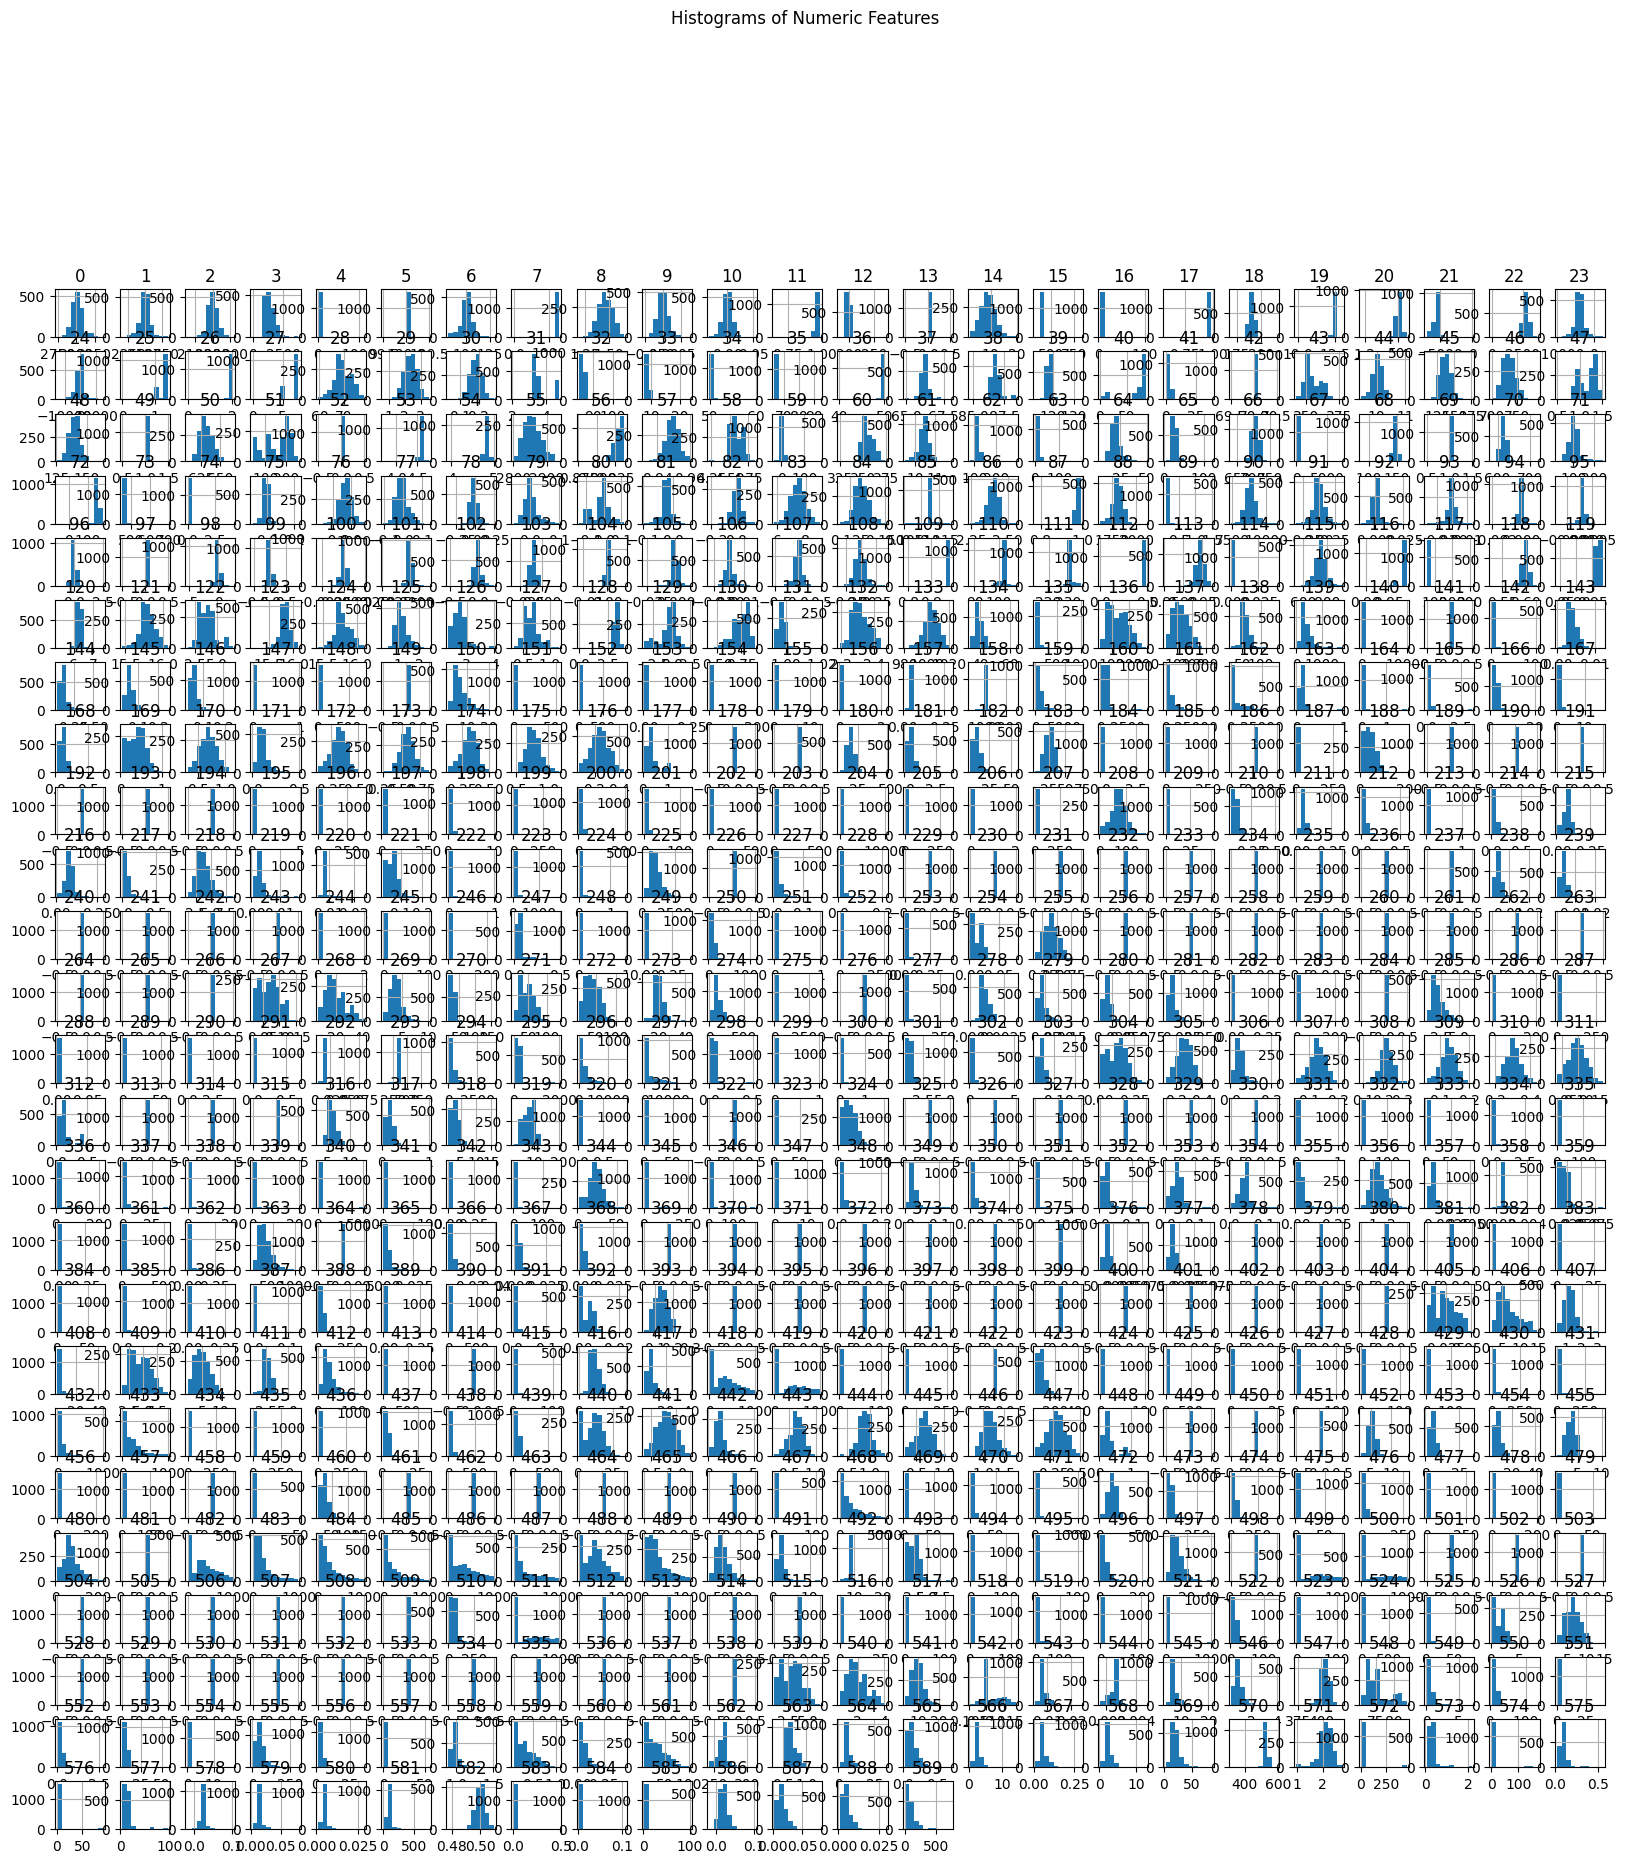

Multivariate analysis (Correlation Matrix):


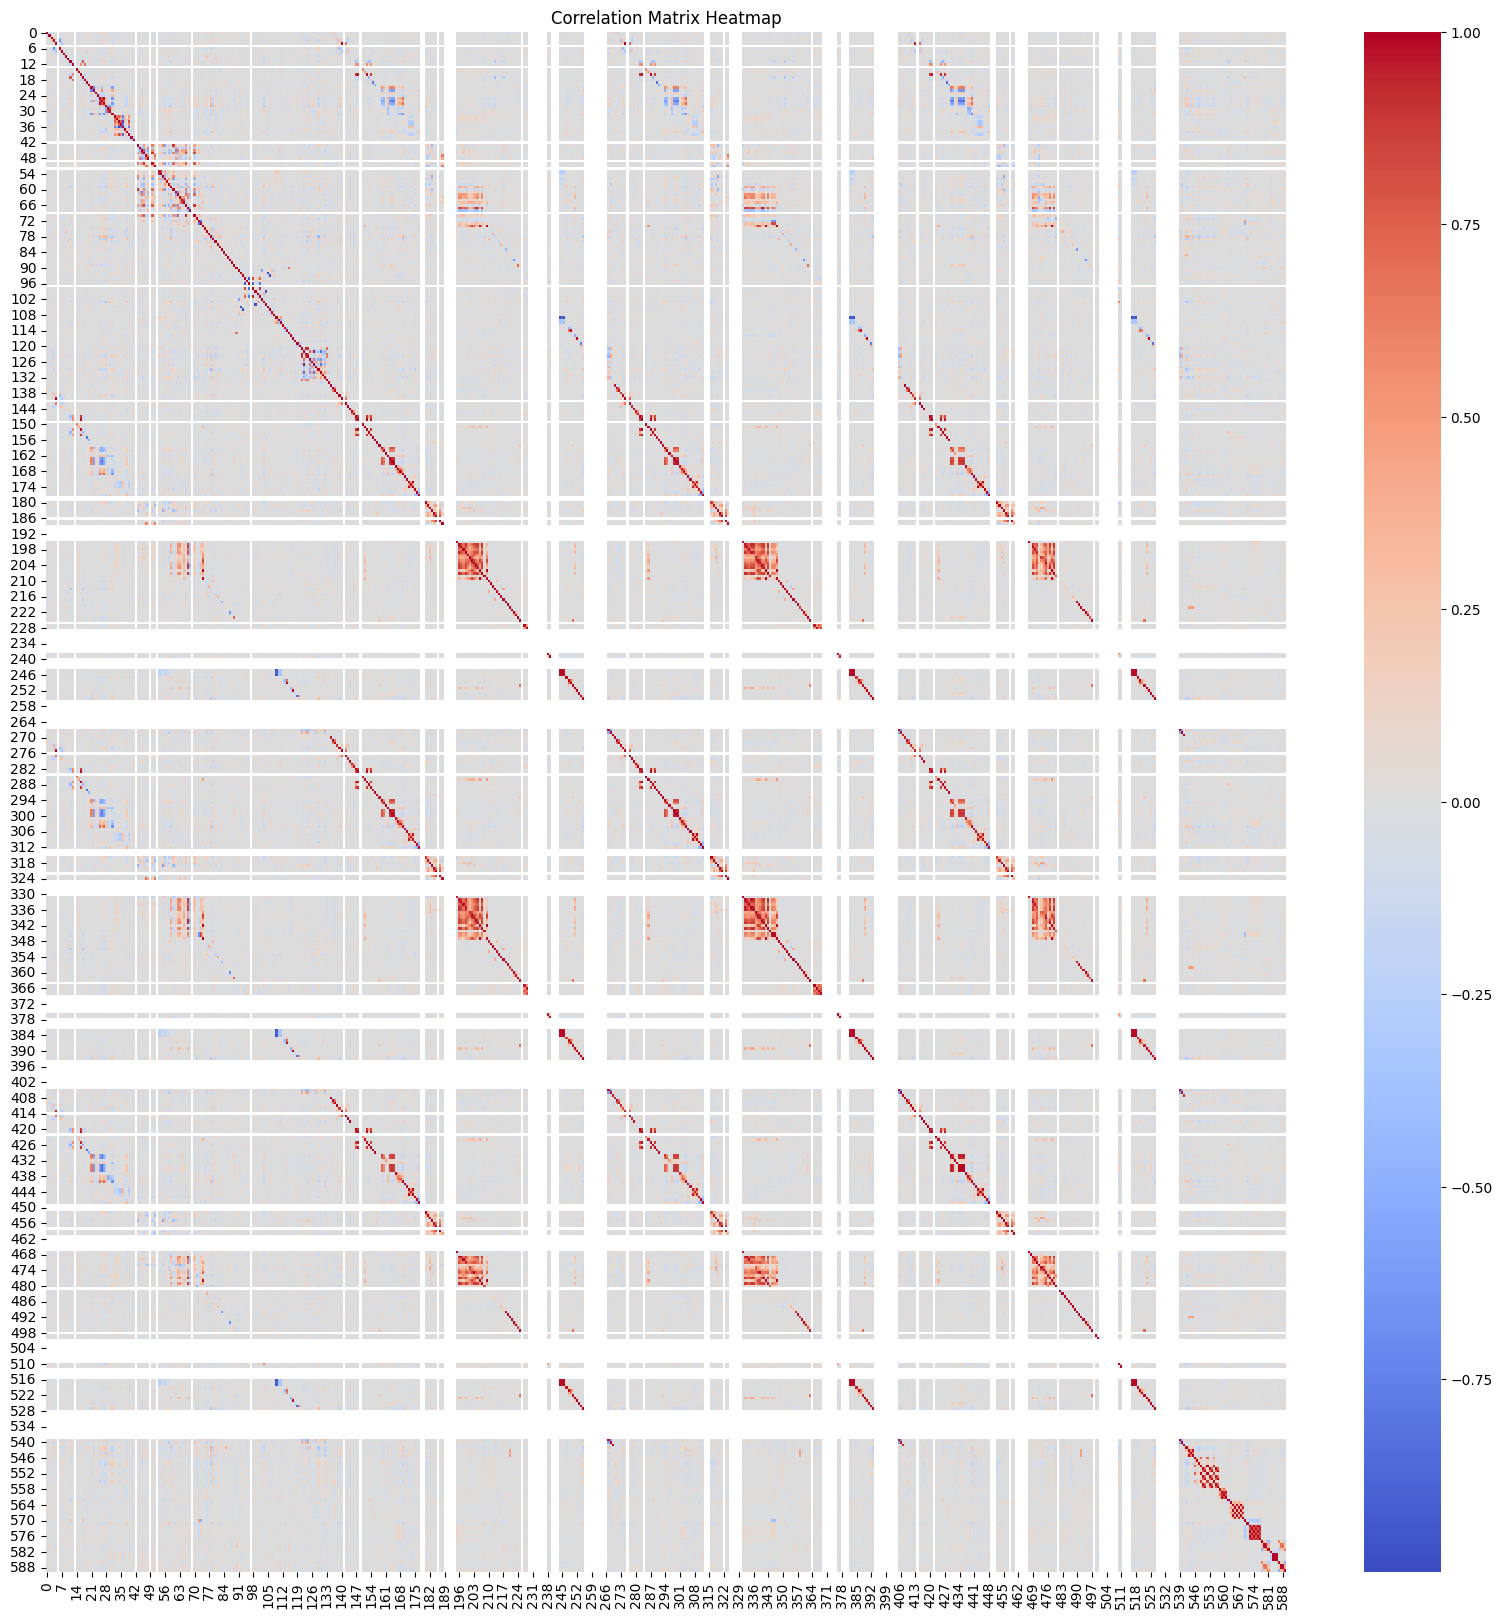

Pairplot for a subset of features:


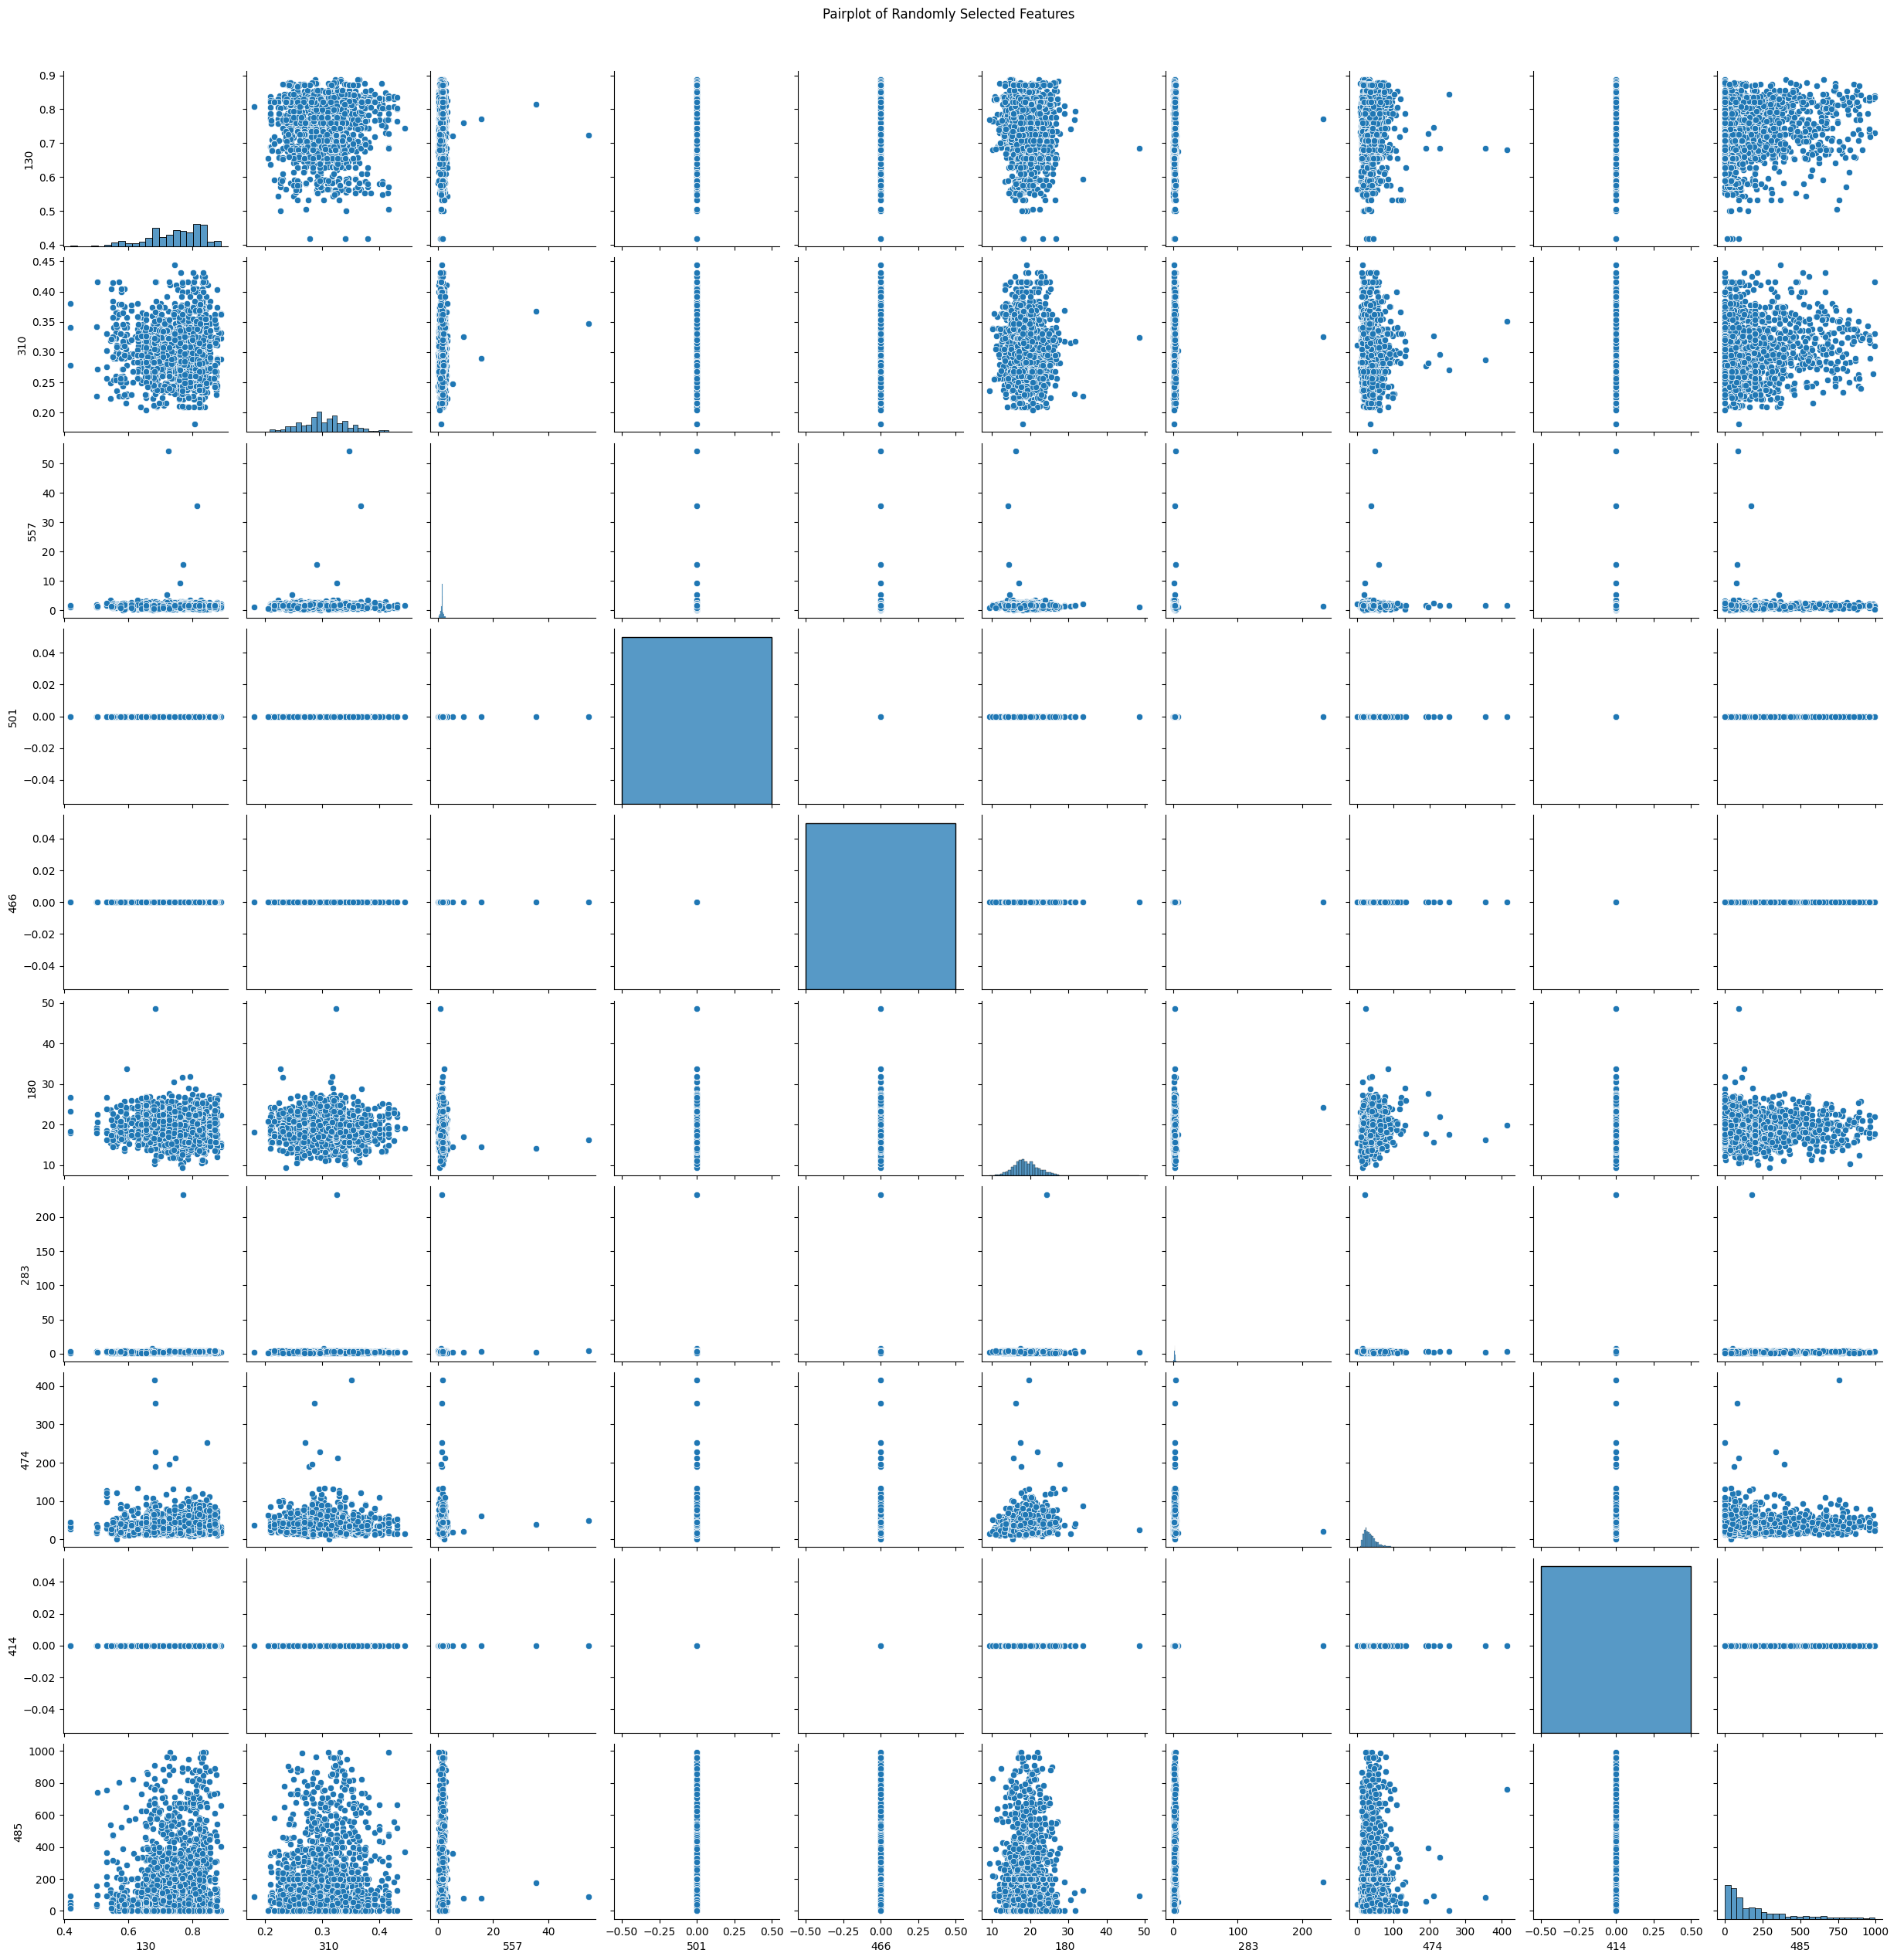

In [ ]:
# Perform detailed relevant statistical analysis on the data
print("Detailed statistical analysis:")
print(data.describe())

# Filter only numeric columns for analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Univariate analysis
print("Univariate analysis of numeric columns:")
numeric_data.hist(figsize=(20, 20))
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.show()

# Correlation matrix for multivariate analysis
print("Multivariate analysis (Correlation Matrix):")
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pairplot for a subset of features
print("Pairplot for a subset of features:")
subset = numeric_data.sample(n=10, axis=1)  # Randomly sample 10 columns for pairplot
sns.pairplot(subset)
plt.suptitle("Pairplot of Randomly Selected Features", y=1.02)
plt.show()

**Observation:**
1)Univariate Analysis Histograms:
Most of the histograms show Discrete visual representation

#4) Data Processing

In [ ]:
data=pd.read_csv('sensor_data_cleansed.csv')
# Assuming the last column is the target, identify its index
target_column = data.columns[-1]
print("Target column identified:", target_column)

# Segregate predictors and target attributes
X = data.drop(columns=[target_column])
y = data[target_column]

# Ensure X and y are valid
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Discretize the target variable
n_bins = 3  # Adjust the number of bins as needed
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_discretized = discretizer.fit_transform(y.values.reshape(-1, 1)).flatten()

print("Discretized target value counts:")
print(pd.Series(y_discretized).value_counts())

# Check for empty arrays
if X.empty or y_discretized.size == 0:
    raise ValueError("Error: X or y is empty.")
else:
    print("X and y are not empty.")

# Apply SMOTE to balance the target classes
try:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y_discretized)
    print("SMOTE applied successfully.")
except ValueError as e:
    raise ValueError(f"Error during SMOTE application: {e}")

# Check if y_resampled is defined and not empty
if 'y_resampled' not in locals() or y_resampled.size == 0:
    raise ValueError("Error: y_resampled is not defined or empty after SMOTE application.")

print("Target value counts after balancing:")
print(pd.Series(y_resampled).value_counts())

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the pre-processed data
pd.DataFrame(X_train_scaled).to_csv('X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('X_test_scaled.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

print("Pre-processing complete. Pre-processed data saved.")

Target column identified: 589
Shape of X: (1567, 589)
Shape of y: (1567,)
Discretized target value counts:
0.0    1458
1.0      96
2.0      13
Name: count, dtype: int64
X and y are not empty.
SMOTE applied successfully.
Target value counts after balancing:
0.0    1458
1.0    1458
2.0    1458
Name: count, dtype: int64
Pre-processing complete. Pre-processed data saved.


#5)Model Training

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint, uniform
import joblib

# Load the pre-processed data
X_train = pd.read_csv('X_train_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Flatten y_train and y_test to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Define models and their hyperparameters for RandomizedSearchCV
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'NaiveBayes': GaussianNB()
}

param_distributions = {
    'RandomForest': {
        'n_estimators': randint(50, 200),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5)
    },
    'SVM': {
        'C': uniform(0.1, 100),
        'gamma': uniform(0.001, 1),
        'kernel': ['linear', 'rbf']
    },
    'NaiveBayes': {}
}

# Train and tune models using RandomizedSearchCV
best_models = {}
for model_name in models:
    print(f"Training and tuning {model_name}...")

    model = models[model_name]
    param_dist = param_distributions[model_name]

    if param_dist:
        random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
    else:
        # Naive Bayes doesn't have hyperparameters to tune
        best_model = model
        best_model.fit(X_train, y_train)

    best_models[model_name] = best_model

# Evaluate models and compare performance
model_performance = {}
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"{model_name} Train Accuracy: {train_accuracy}")
    print(f"{model_name} Test Accuracy: {test_accuracy}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    model_performance[model_name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred_test, output_dict=True)
    }

# Select the best model based on test accuracy
best_model_name = max(model_performance, key=lambda x: model_performance[x]['test_accuracy'])
best_model = best_models[best_model_name]

print(f"The best model is {best_model_name} with Test Accuracy: {model_performance[best_model_name]['test_accuracy']}")

# Save the selected model
joblib.dump(best_model, f'{best_model_name}_model.pkl')
print(f"Best model saved as {best_model_name}_model.pkl.")

Training and tuning RandomForest...
Training and tuning SVM...
Training and tuning NaiveBayes...
Evaluating RandomForest...
RandomForest Train Accuracy: 1.0
RandomForest Test Accuracy: 0.9977142857142857
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       310
         1.0       0.99      1.00      1.00       286
         2.0       1.00      1.00      1.00       279

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

Evaluating SVM...
SVM Train Accuracy: 1.0
SVM Test Accuracy: 0.9965714285714286
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       310
         1.0       0.99      1.00      0.99       286
         2.0       1.00      1.00      1.00       279

    accuracy                           1.00       875
   macro avg     